## What You're Aiming For

In this checkpoint, we are going to work on the 'Electric Vehicle Data' dataset that was provided by Kaggle as part of the Electric Vehicle Price Prediction competition.

Dataset description: This dataset contains information on the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered with the Washington State Department of Licensing (DOL). This dataset was introduced as part of an official invitation-based competition on Kaggle. Our SVM model should answer the question "This is my car's model & make, along with a few other parameters, what price can this vehicle be brought or sold?”

### Instructions

- Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
- Select your target variable and the features
- Split your dataset to training and test sets
- Build and train an SVM model on the training set
- Assess your model performance on the test set using relevant evaluation metrics
- Discuss with your cohort alternative ways to improve your model performance

In [97]:
import warnings
warnings.filterwarnings("ignore")

In [99]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [1]:
import pandas as pd
import numpy as np 

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import machine learning

from sklearn.svm import SVR

from sklearn.model_selection import train_test_split #split
from sklearn.metrics import accuracy_score #metrics

#tools for hyperparameters search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer  # For model evaluation metrics
from sklearn.model_selection import GridSearchCV

# import the label Encoder library 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Electric_cars_dataset.csv")

In [ ]:
df.head(2)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64329 entries, 0 to 64352
Data columns (total 14 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   County                                             64325 non-null  object 
 1   City                                               64320 non-null  object 
 2   State                                              64329 non-null  object 
 3   Model Year                                         64322 non-null  float64
 4   Make                                               64325 non-null  object 
 5   Model                                              64329 non-null  object 
 6   Electric Vehicle Type                              64329 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  64329 non-null  object 
 8   Electric Range                                     64329 non-null  int64  
 9   Base MSRP  

In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ZIP Code,64347.0,9.814345e+04,2.856064e+03,745.0,98052.0,98121.0,98370.0,99701.0
Model Year,64346.0,2.018186e+03,2.726742e+00,1993.0,2017.0,2018.0,2021.0,2022.0
Electric Range,64353.0,1.069490e+02,1.040939e+02,0.0,14.0,73.0,215.0,337.0
Base MSRP,64353.0,2.524991e+03,1.240290e+04,0.0,0.0,0.0,0.0,845000.0
Legislative District,64184.0,2.995190e+01,1.466112e+01,0.0,19.0,34.0,43.0,49.0
DOL Vehicle ID,64353.0,1.972905e+08,1.069466e+08,4385.0,137286488.0,175377597.0,229903894.0,478934571.0


In [128]:
df.isnull().sum()

County                                               0
City                                                 0
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Expected Price ($1k)                                 0
dtype: int64

In [3]:
df.dropna(subset=['County'], inplace=True)

In [4]:
df.dropna(subset=['City'], inplace=True)

In [5]:
df.dropna(subset=['State'], inplace=True)

In [6]:
df.dropna(subset=['Model'], inplace=True)

In [7]:
df.dropna(subset=['Make'], inplace=True)

In [8]:
df.dropna(subset=['Model Year'], inplace=True)

In [9]:
df['Expected Price ($1k)'] = pd.to_numeric(df['Expected Price ($1k)'], errors='coerce')

In [ ]:
df["County"].value_counts()

In [ ]:
df["City"].value_counts()

In [ ]:
df["Expected Price ($1k)"].value_counts()

In [ ]:
df["Electric Vehicle Type"].value_counts()

In [ ]:
df['Model'].value_counts()

In [27]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Clean Alternative Fuel Vehicle Eligible                         39915
Eligibility unknown as battery range has not been researched    14934
Not eligible due to low battery range                            9456
Name: count, dtype: int64

In [ ]:
df["Make"].value_counts()

In [ ]:
df[df["County"].isna()]

In [11]:
df["County"].dropna(inplace = True)

In [12]:
df.drop('ID', axis=1, inplace=True)
df.drop('VIN (1-10)', axis=1, inplace=True)
df.drop('ZIP Code', axis=1, inplace=True)
df.drop('Electric Utility', axis=1, inplace=True)
df.drop('Vehicle Location', axis=1, inplace=True)
df.drop('Legislative District', axis=1, inplace=True)

In [ ]:
numerical_features = df.select_dtypes(include='number').columns
numerical_features

In [29]:
df.head()

,Model Year,Model,Electric Range,Expected Price ($1k),EV_Type_Battery Electric Vehicle (BEV),EV_Type_Plug-in Hybrid Electric Vehicle (PHEV),AUDI,AZURE DYNAMICS,BENTLEY,BMW,...,SUBARU,TESLA,TH!NK,TOYOTA,VOLKSWAGEN,VOLVO,WHEEGO ELECTRIC CARS,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not been researched,Not eligible due to low battery range
0,2020.0,57,308,50.00,True,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,2011.0,53,73,15.00,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2015.0,45,81,18.00,True,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,2013.0,96,38,33.90,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2019.0,15,238,41.78,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
df["County"] = label_encoder.fit_transform(df["County"])

In [15]:
df["Model"] = label_encoder.fit_transform(df["Model"])

In [16]:
df["City"] = label_encoder.fit_transform(df["City"])
df["State"] = label_encoder.fit_transform(df["State"])

In [17]:
dummies = pd.get_dummies(df['Electric Vehicle Type'], prefix='EV_Type')

# Join the dummy variables to the original DataFrame
df = df.join(dummies)

# Drop the original 'Electric Vehicle Type' column
df = df.drop('Electric Vehicle Type', axis=1)

In [28]:
dummies = pd.get_dummies(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Join the dummy variables to the original DataFrame
df = df.join(dummies)

# Drop the original 'Electric Vehicle Type' column
df = df.drop('Clean Alternative Fuel Vehicle (CAFV) Eligibility', axis=1)

In [ ]:
dummies = pd.get_dummies(df['Make'])

# Join the dummy variables to the original DataFrame
df = df.join(dummies)

# Drop the original 'Electric Vehicle Type' column
df = df.drop('Make', axis=1)

In [31]:
numerical_features = df.select_dtypes(include='number').columns
numerical_features

Index(['Model Year', 'Model', 'Electric Range', 'Expected Price ($1k)'], dtype='object')

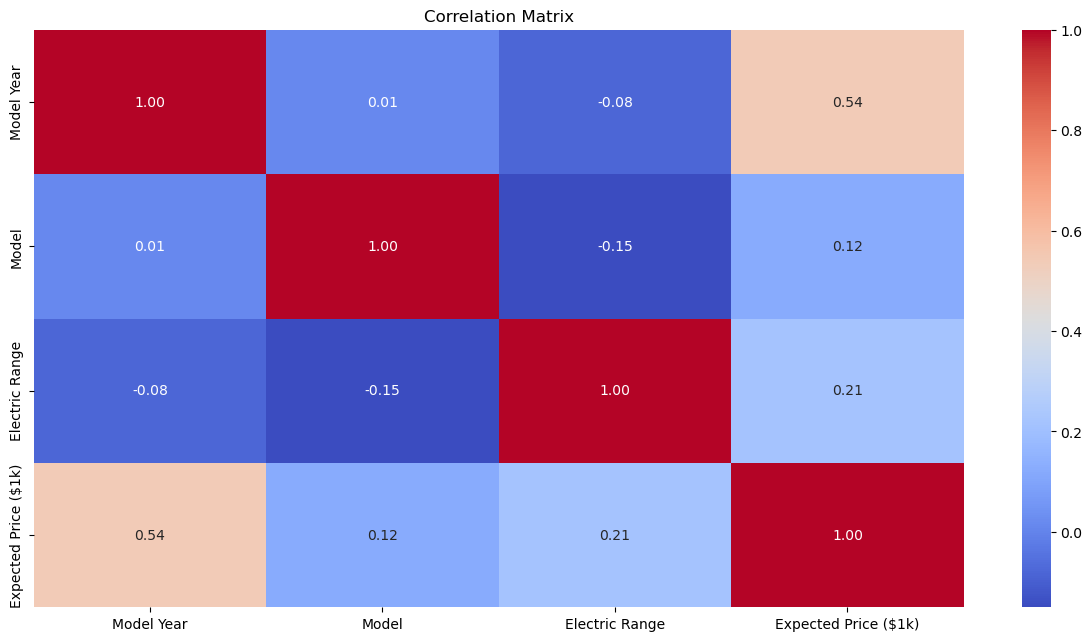

In [32]:
plt.figure(figsize=(15, 7.5))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [33]:
numerical_features = df.select_dtypes(include='number').columns
correlation = df[numerical_features].corr().apply(abs)
correlation = correlation[['Expected Price ($1k)']].sort_values(['Expected Price ($1k)'], ascending=False)
correlation

# Set a threshold for low correlation (e.g., absolute correlation < 0.1)
threshold = 0.1

# Filter the column names that have an absolute correlation with SalePrice below the threshold
low_corr_columns = correlation[correlation['Expected Price ($1k)']< threshold].index.tolist()

# Print the list of columns with low correlation
print(f"Columns with correlation less than {threshold}:\n", low_corr_columns)

Columns with correlation less than 0.1:
 []


In [22]:
df = df.drop(columns=low_corr_columns)

In [34]:
X = df.drop(columns=['Expected Price ($1k)'])  # Drop the target column to get features
y = df["Expected Price ($1k)"]  # Select the target column

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [37]:
# Initialize the model with some parameters
svr_reg = SVR(kernel='rbf', C=100, epsilon=0.1)

# Fit the model
svr_reg.fit(X_train_scaled, y_train)

# Predicting on test data
y_pred_svr = svr_reg.predict(X_test_scaled)

# Model evaluation
print("SVR RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("SVR R2 Score:", r2_score(y_test, y_pred_svr))

SVR RMSE: 8.386123068227574
SVR R2 Score: 0.8771032953906432


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
